# How Manhattan and Toronto neighbourhoods are different?

## Project Description
### In this project machine learning classification techniques used to distinguish if neighbourhood belongs to Manhattan or Toronto.
### There are 79 neighbourhoods. The dataset has 358 feafures describing frequency of appearance of various venues in each neighbourhoods. The "Code" column is the target. 0 indicates "Manhattan" and 1 indicates "Toronto".

## Metodology
### Data extraction:
#### The dataset built from two parts, "Manhattan venues frequency" and "Toronto venues frequency". The datasets are combined and redundant values marked as zeroes.
### Data cleaning:
#### A type of all the features is float, the target is integer. The dataset is checked for duplicates, null values and homogeneous features.
### Machine learning:
#### Preparation of the machine learning work includes train-test split, normalizing the model with standard scaler and training of knn, logistic regression, decision tree and random fores models.
### 5-fold cross validation score is calculated for all the models.
### Showing top 35 venues influencing the classicification of random forest model.


## Conclusion
### Random forest model made the highest score prediction of 87%.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Importing the datasets, removing unnecessary columns and adding the target column

In [2]:
df_m = pd.read_csv('manhattan_grouped.csv')

In [3]:
df_t = pd.read_csv('toronto_grouped.csv')

In [4]:
df_m.head(3)

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,...,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.020833,0.020833,0.0,0.0,0.020833,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.020833,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.020833,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,Carnegie Hill,0.0,0.0,0.0,0.000000,0.013514,0.0,0.0,0.000000,0.027027,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.013514,0.027027,0.0,0.040541,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.040541,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.013514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013514,0.0,0.0,0.0,0.013514,0.040541,0.0,0.013514,0.040541
2,Central Harlem,0.0,0.0,0.0,0.066667,0.044444,0.0,0.0,0.022222,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.022222,0.0,0.022222,0.000000,0.0,0.044444,0.0,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.022222,0.022222,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [5]:
df_m.shape

(40, 325)

In [6]:
df_m.drop('Neighborhood', axis=1, inplace=True)

In [7]:
df_m['Code'] = 0

In [8]:
df_m.head(3)

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,...,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Code
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.020833,0.020833,0.0,0.0,0.020833,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.020833,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.020833,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
1,0.0,0.0,0.0,0.000000,0.013514,0.0,0.0,0.000000,0.027027,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.013514,0.027027,0.0,0.040541,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.040541,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.013514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013514,0.0,0.0,0.0,0.013514,0.040541,0.0,0.013514,0.040541,0
2,0.0,0.0,0.0,0.066667,0.044444,0.0,0.0,0.022222,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.022222,0.0,0.022222,0.000000,0.0,0.044444,0.0,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.022222,0.022222,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0


In [9]:
df_t.head(3)

,Borough,Neighborhoods,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,...,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Central Toronto,Davisville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,...,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Central Toronto,Davisville North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Central Toronto,Forest Hill North & West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_t.shape

(39, 223)

In [11]:
df_t.drop(['Borough','Neighborhoods'], axis=1, inplace=True)

In [12]:
df_t['Code'] = 1

In [13]:
df_t.head(3)

,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,...,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Code
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Combining the datasets and reordering the columns

In [14]:
df = df_m.append(df_t).fillna(0).astype(float)

In [15]:
df.Code = df.Code.astype(int)

In [16]:
df.Code.value_counts()

0    40
1    39
Name: Code, dtype: int64

In [17]:
df.columns.tolist().index('Code')

324

In [18]:
fixed_columns = list(df.columns[325:]) + list(df.columns[:325])
df = df[fixed_columns]

In [19]:
df.columns.tolist().index('Code')

358

In [20]:
df.shape

(79, 359)

In [21]:
df.head(3)

,Aquarium,Belgian Restaurant,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Costume Shop,Creperie,Distribution Center,Dry Cleaner,Elementary School,Fish & Chips Shop,General Travel,Gluten-free Restaurant,Home Service,IT Services,Indoor Play Area,Intersection,Lake,Light Rail Station,Moving Target,Neighborhood,Other Nightlife,Pastry Shop,Poutine Place,Sculpture Garden,Skating Rink,Soup Place,Souvlaki Shop,Summer Camp,Swim School,Tanning Salon,Theme Restaurant,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,...,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Code
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.013514,0.0,...,0.0,0.013514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013514,0.0,0.0,0.0,0.013514,0.040541,0.0,0.013514,0.040541,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.044444,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0


## Shuffling the dataset

In [22]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=42).reset_index(drop=True)

In [23]:
df.head(3)

,Aquarium,Belgian Restaurant,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Costume Shop,Creperie,Distribution Center,Dry Cleaner,Elementary School,Fish & Chips Shop,General Travel,Gluten-free Restaurant,Home Service,IT Services,Indoor Play Area,Intersection,Lake,Light Rail Station,Moving Target,Neighborhood,Other Nightlife,Pastry Shop,Poutine Place,Sculpture Garden,Skating Rink,Soup Place,Souvlaki Shop,Summer Camp,Swim School,Tanning Salon,Theme Restaurant,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,...,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Code
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,...,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0


## Cleaning the dataset

In [24]:
df.duplicated().sum()

1

In [25]:
df.drop_duplicates(keep='first', inplace=True)

In [26]:
df.duplicated().sum()

0

In [27]:
un_test = df.std() == 0
un_test.sum()

0

# Train-test splitting

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.25, random_state=42)

In [29]:
X_train.shape

(58, 358)

In [30]:
y_train.shape

(58,)

In [31]:
X_test.shape

(20, 358)

In [32]:
y_test.shape

(20,)

## Normalizing the model with standard scaler

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

## Machine learning traning and prediction with 5-fold cross validation

In [34]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

scores = cross_val_score(neigh, df.iloc[:,:-1], df.iloc[:,-1], cv=5)
scores.mean()

print('K Neighbors: \nMean Jaccart score is {:.2f}'.format(scores.mean()))
print('Cross validation scores:', scores)

K Neighbors: 
Mean Jaccart score is 0.73
Cross validation scores: [0.625      0.875      0.6875     0.6        0.86666667]


In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

scores = cross_val_score(logreg, df.iloc[:,:-1], df.iloc[:,-1], cv=5)
scores.mean()

print('Logistic Regression: \nMean Jaccart score is {:.2f}'.format(scores.mean()))
print('Cross validation scores:', scores)

Logistic Regression: 
Mean Jaccart score is 0.60
Cross validation scores: [0.625      0.5625     0.625      0.53333333 0.66666667]


In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

scores = cross_val_score(tree, df.iloc[:,:-1], df.iloc[:,-1], cv=5)
scores.mean()

print('Decision Tree: \nMean Jaccart score is {:.2f}'.format(scores.mean()))
print('Cross validation scores:', scores)

Decision Tree: 
Mean Jaccart score is 0.77
Cross validation scores: [0.75       0.8125     0.6875     0.86666667 0.73333333]


In [37]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

scores = cross_val_score(forest, df.iloc[:,:-1], df.iloc[:,-1], cv=5)
scores.mean()

print('Random Forest: \nMean Jaccart score is {:.2f}'.format(scores.mean()))
print('Cross validation scores:', scores)

Random Forest: 
Mean Jaccart score is 0.87
Cross validation scores: [0.6875     1.         0.8125     0.86666667 1.        ]


## Understanding importance of the features on the classification prediction by random forest classifier

In [38]:
data = {'Venue': df.iloc[:,:-1].columns.tolist(), 'Influence': forest.feature_importances_}
df_importance = pd.DataFrame.from_dict(data)

In [39]:
df_importance.sort_values(by='Influence', ascending=False, ignore_index=True, inplace=True)

In [40]:
df_importance.head(35)

,Venue,Influence
0,Mexican Restaurant,0.049514
1,Wine Bar,0.041178
2,Chinese Restaurant,0.030107
3,Burger Joint,0.029170
4,Pizza Place,0.029038
5,Wine Shop,0.028852
6,Restaurant,0.026575
7,Mediterranean Restaurant,0.024075
8,Spanish Restaurant,0.023645
9,Coffee Shop,0.022437


### Showing top 35 influencers

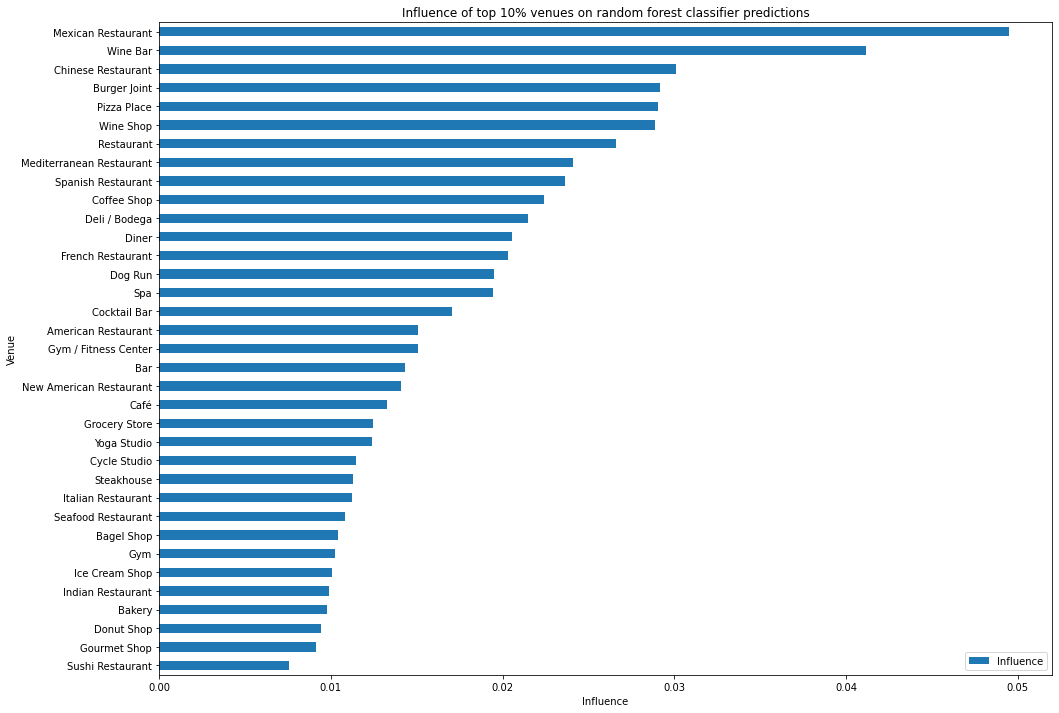

<Figure size 432x288 with 0 Axes>

In [41]:
ax = df_importance.head(35)[::-1].plot.barh(x='Venue',y='Influence',figsize=(16, 12))

plt.xlabel("Influence")
plt.ylabel("Venue")

plt.title('Influence of top 10% venues on random forest classifier predictions')
plt.legend()

plt.show()

plt.savefig('venues_influence.png')